In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

In [27]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

In [28]:
vocab = vectorizer.get_feature_names_out()
print("\nTotal Vocabulary Size:", len(vocab))
print("\nSample Vocabulary (first 30 words):", vocab[:30])


Total Vocabulary Size: 7735

Sample Vocabulary (first 30 words): ['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '0125698789' '02' '0207' '02072069400' '02073162414' '02085076972' '021'
 '03' '04' '0430' '05' '050703' '0578' '06' '07' '07046744435'
 '07090201529' '07090298926' '07099833605' '07123456789' '0721072'
 '07732584351' '07734396839']


In [29]:
tfidf_matrix = pd.DataFrame(
    X_train_tfidf[:5].toarray(),
    columns=vocab
)

In [30]:
print("\nTF-IDF Matrix (first 5 messages, first 20 words):")
print(tfidf_matrix.iloc[:, :20])


TF-IDF Matrix (first 5 messages, first 20 words):
         00  000  000pes  008704050406  0089  0121  01223585236  0125698789  \
0  0.000000  0.0     0.0           0.0   0.0   0.0          0.0         0.0   
1  0.243404  0.0     0.0           0.0   0.0   0.0          0.0         0.0   
2  0.000000  0.0     0.0           0.0   0.0   0.0          0.0         0.0   
3  0.000000  0.0     0.0           0.0   0.0   0.0          0.0         0.0   
4  0.000000  0.0     0.0           0.0   0.0   0.0          0.0         0.0   

    02  0207  02072069400  02073162414  02085076972  021   03       04  0430  \
0  0.0   0.0          0.0          0.0          0.0  0.0  0.0  0.00000   0.0   
1  0.0   0.0          0.0          0.0          0.0  0.0  0.0  0.00000   0.0   
2  0.0   0.0          0.0          0.0          0.0  0.0  0.0  0.00000   0.0   
3  0.0   0.0          0.0          0.0          0.0  0.0  0.0  0.00000   0.0   
4  0.0   0.0          0.0          0.0          0.0  0.0  0.0  0.23253   0

In [31]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [32]:
y_pred = model.predict(X_test_tfidf)

In [33]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    print(f"{title} Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(classification_report(y_true, y_pred))


Model Evaluation:
Accuracy: 0.9623318385650225


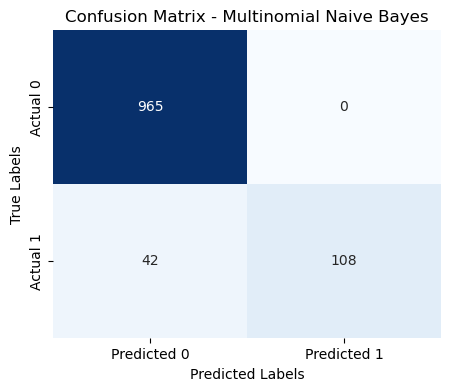

Multinomial Naive Bayes Accuracy: 0.96
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [34]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
plot_conf_matrix(y_test, y_pred, "Multinomial Naive Bayes")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [35]:
test_message = ["Congratulations! You have won a free ticket to Bahamas. Text WIN to 12345"]
test_message_counts = vectorizer.transform(test_message)
prediction = model.predict(test_message_counts)
print("test message:", test_message[0])
if(prediction[0]=='ham'):
    print("predicted label: ham (not spam)")
else:
    print("predicted label:", prediction[0])

test message: Congratulations! You have won a free ticket to Bahamas. Text WIN to 12345
predicted label: spam


In [36]:
test_message = ["Hey, are we still meeting for lunch tomorrow at 1 pm?"]
test_message_counts = vectorizer.transform(test_message)
prediction = model.predict(test_message_counts)
print("test message:", test_message[0])
if(prediction[0]=='ham'):
    print("predicted label: ham (not spam)")
else:
    print("predicted label:", prediction[0])

test message: Hey, are we still meeting for lunch tomorrow at 1 pm?
predicted label: ham (not spam)
